In [12]:
import pandas as pd
import functions 
import datetime as datetime
import math
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt


In [ ]:
# Load results
results = pd.read_csv('2018-Olympics-L-3000.csv')
results.head()

In [ ]:
def clean(x):
    '''function to clean results csv'''
    #Convert time to proper form and cast to float
    x['Time']= x['Time'].str.replace('.', ':')
    x['Time']= x['Time'].str.replace(',', ':')
    x['Time']= x['Time'].str.replace(' ', '')
    # Drop column
    x=x.drop(columns = ['Unnamed: 5'])
    # Rename columns
    x=x.rename(columns={'Unnamed: 2':'Age'})
    return x.head()

clean(results)

In [ ]:
results

In [ ]:
def convert_date_string_to_datetime(time_string):
    t=datetime.strptime(time_string, "%M:%S:%f")
    delta = timedelta(minutes=t.minute,seconds=t.second)
    return delta




In [ ]:
def convert_date_string_to_datetime(time_string):
    '''function to convert time to minutes'''
    t=datetime.strptime(time_string, "%M:%S:%f")
    delta = timedelta(minutes=t.minute,seconds=t.second)
    return delta


results['datetime']= results['Time'].apply(convert_date_string_to_datetime)
results['Minutes'] = results['datetime'].dt.seconds/60
#df[['Place' ,'Age', 'Bib No']] = df[['Place' ,'Age', 'Bib No']].astype(int)
results = results.sort_values(by = 'datetime').reset_index(drop=True)

results.head()

In [ ]:
#Clean up columns
# TODO figure out why line after function did not recoginize changes

 results=results.drop(columns = ['Unnamed: 5'])
# Rename columns
results=results.rename(columns={'Unnamed: 2':'Age'})
results

# Viz

In [9]:
# Age

NameError: name 'Age' is not defined

In [8]:
# Groupby Age
results.groupby('Age').count()

,Rank,Name,Country,Time,datetime,Minutes
Age,,,,,,
L30,4,4,4,4,4,4
L35,1,1,1,1,1,1
L45,1,1,1,1,1,1
LA1,1,1,1,1,1,1
LN2,1,1,1,1,1,1
LN3,2,2,2,2,2,2
LN4,3,3,3,3,3,3
LSA,11,11,11,11,11,11


In [11]:
# Turn Grouby into a useable form
age = results.groupby('Age').count().reset_index()
# Just select needed column
age = age[['Age','Rank']].copy()
#Rename columns
age.columns=[['Age','count']]
# age.drop.iloc[11] TODO delete unknown age
age.dtypes

array([['L30', 4],
       ['L35', 1],
       ['L45', 1],
       ['LA1', 1],
       ['LN2', 1],
       ['LN3', 2],
       ['LN4', 3],
       ['LSA', 11]], dtype=object)

In [15]:
age.dtypes

Age      object
count     int64
dtype: object

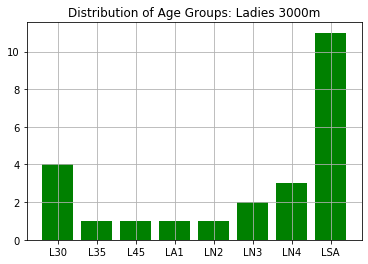

<Figure size 432x288 with 0 Axes>

In [23]:
# Visulize age groups
# TODO figure the interger scaler issue error
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [4, 1, 1, 1, 1, 2, 3, 11]
bars = ('L30', 'L35', 'L45', 'LA1', 'LN2','LN3','LN4','LSA')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height,color='g')
plt.title('Distribution of Age Groups: Ladies 3000m')
plt.grid(True)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.figure()

# Show graphic
plt.show()

 